importing libraries pandas for work to do with dataframe analyse numpy metrics

In [1]:
import pandas as pd
import numpy as np

librarie for plots chats

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from datetime import datetime

scikit learn library imports for preprocessing data

In [4]:
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
# pipe line
from sklearn.pipeline import Pipeline
# tuning or otimized value of hyper parameters link n_components or for n_nearst
from sklearn.model_selection import GridSearchCV
# import imblearn.over_sampling



for deviding data set into test and train set

In [5]:
# from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.neighbors import KNeighborsRegressor

for validation

In [7]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
# for best selection of model
from sklearn.model_selection import cross_val_score


models of regression

In [8]:

from sklearn.linear_model import LinearRegression,  Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [9]:
# uploading dataset into our working enviornment
from google.colab import files
uploaded = files.upload()

Saving Stock Exchange KSE 100(Pakistan).csv to Stock Exchange KSE 100(Pakistan).csv


In [10]:
df_orignal = pd.read_csv('Stock Exchange KSE 100(Pakistan).csv')
df_orignal.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [ ]:
df_orignal.shape

(3221, 7)

our data frame has 3221 rows and 7 columns

In [ ]:
df_orignal.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Volume'], dtype='object')

this dataset of "Pakistan Stock Exchange
(KSE 100)" I coleelected it from Kaggle here iam providing link "https://www.kaggle.com/datasets/zusmani/pakistan-stock-exchange-kse-100" it has 3221 rows and 7 columns first column at zero index is 'Date' , 2nd 'Open' 3rd 'High', 4th'Low', 5th 'Close', 6th 'Change' and 7th that is at index 6 is 'Volume'

In [11]:
df_orignal.describe()

,Date,Open,High,Low,Close,Change,Volume
count,3221,3221,3221,3221,3221,3221,3221
unique,3221,3213,3215,3211,3209,3104,3220
top,23-Feb-21,"29,269.00","24,777.37","6,639.00","6,639.25",0,"302,831,072"
freq,1,2,2,3,3,5,2


df_orignal.describe() tells us that each of our column has 3221 entries in date column 3221 unique entries we can say there are no duplicated rows what is top value of a column 23-Feb-21 this is the first entry of our dataset from this date to backward our data set is frq 1 of date column once agin conirmed our point that there are no duplicated rows

In [12]:
# checking for duplicated rows
duplicated_rows = df_orignal.duplicated().sum()
print(duplicated_rows)

0


In [13]:
df_orignal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3221 non-null   object
 1   Open    3221 non-null   object
 2   High    3221 non-null   object
 3   Low     3221 non-null   object
 4   Close   3221 non-null   object
 5   Change  3221 non-null   object
 6   Volume  3221 non-null   object
dtypes: object(7)
memory usage: 176.3+ KB


our data set has 3220 rows 7 columns we can see there are zero NaN values we have numrical dataset but it show us object type my be beacuse of ",-" type special characters or may be they are in strings form due to "" we will convert them in their proper format almost 176 kb size

In [14]:
df_orignal.shape

(3221, 7)

we dont want to make any changes in our data set during our tasks so we will make a copy of origanl data set and will play with it

In [ ]:
df = df_orignal.copy()
df.head(3)

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"


In [ ]:
df.dtypes

,0
Date,object
Open,object
High,object
Low,object
Close,object
Change,object
Volume,object


we can see all of our numerical columns or of object type Date column should b of date64 type and rest should b of float64 or int64 so we have to convert them to there orignal format

In [ ]:
df['Date'].dtype

dtype('O')

to convert date type we will use pandas built in function  "pandas.to_datetime()"

In [ ]:
# Converting the 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'],
                            format='%d-%b-%y'
                              # dtype='datetime64[ns, UTC-05:00]', freq=None
                            )
df['Date'].dtype

dtype('<M8[ns]')

it is converted successfully

In [ ]:
# checking for minmum and max date
minimum_date =df['Date'].min()
maximum_date = df['Date'].max()
# print(minimum_date)
print( minimum_date )
print(maximum_date)

2008-02-22 00:00:00
2021-02-23 00:00:00


we can see our data set is from feb 2008 to feb 2021 almost 13 years of data we have

now we will set column Date as our index

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2021-02-23,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
2021-02-22,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2021-02-19,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
2021-02-18,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
2021-02-17,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


now we will convert our remaining columns to numeric type but first we remove special characters using python regix method

In [ ]:
df =df.replace('[^\d.]', '', regex=True)
df

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2021-02-23,31722.16,31800.90,31597.31,31626.19,21.38,718191025
2021-02-22,31874.78,31958.58,31612.55,31647.57,203.61,721952658
2021-02-19,31748.75,31904.30,31749.43,31851.18,91.36,694795084
2021-02-18,32049.85,32104.67,31745.72,31759.82,288.86,577837595
2021-02-17,32166.21,32390.77,32044.01,32048.68,93.15,701658181
...,...,...,...,...,...,...
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784


In [ ]:
df['Open'].dtype

dtype('O')

it is still 'object type' so we will use pandas pandas_to.numeric()" function

In [ ]:
# converting column Open to its type
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Open'].dtype

dtype('float64')

In [ ]:
df['Open'].tail()

,Open
Date,
2008-02-28,10688.98
2008-02-27,10670.68
2008-02-26,10596.40
2008-02-25,10625.66
2008-02-22,10634.22


sorting of index date

In [ ]:
df = df.sort_index(ascending=True)
df.head()

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0,313082688
2008-02-25,10625.66,10709.06,10579.49,10588.84,18.45,273149184
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584


now we will conver rest of our columns at once using for loop

In [ ]:
# converting all columns to from array type to int r float type
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = pd.to_numeric(df[cols], errors='coerce')

df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Change,float64
Volume,int64


In [ ]:
df.index

DatetimeIndex(['2008-02-22', '2008-02-25', '2008-02-26', '2008-02-27',
               '2008-02-28', '2008-02-29', '2008-03-03', '2008-03-04',
               '2008-03-05', '2008-03-06',
               ...
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-22', '2021-02-23'],
              dtype='datetime64[ns]', name='Date', length=3221, freq=None)

checking for missing values

In [ ]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Change,0
Volume,0


there is no missing values in our dataset we will see how to fill mising values or drop them when we will calculate moving averages

we will draw our first plot of column 'Close' and 'Date'

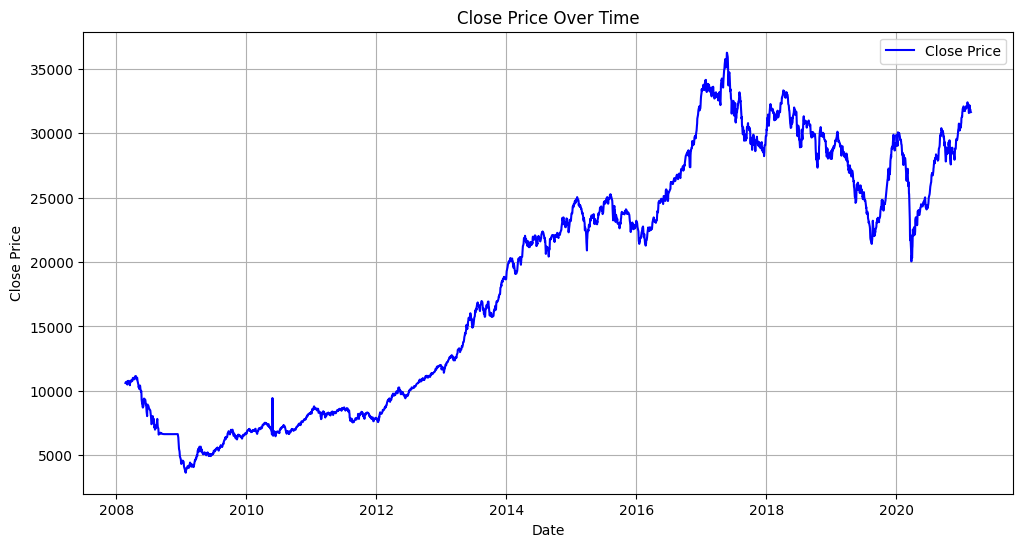

In [ ]:
# ploting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

we can see the up and down of 'Close' in between 2008 to 2010 it was at its lowest
and before 2018 it was at its peak

now we will calculate moving average of column close we will use window 21 as there are 21 working days of a month and we will add a new column in our data set

In [ ]:
df ['moving _avg_close'] = df ['Close'] .rolling(window=21).mean()
df.head()

,Open,High,Low,Close,Change,Volume,moving _avg_close
Date,,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688,NaN
2008-02-25,10625.66,10709.06,10579.49,10588.84,18.45,273149184,NaN
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784,NaN
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776,NaN
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584,NaN


we calulated moving avg and added a column in our data set 'moving_avg_Close' but we have some mising values for first 20 entries

In [ ]:
df['moving _avg_close'].isna().sum()

20

to drop 20 rows i think is not a good idea so we will use mean of column 'moving_avg_CLose' to fill NaN values

In [ ]:
# here we will create a new veriable and store mean value in it
moving_avg_close_mean = df['moving _avg_close'].mean()
moving_avg_close_mean

18786.161856413917

now we will use pandas fillna method to fill mising values in column 'moving_avg_Close'

In [ ]:
# filling NaN values with mean or avg of that column

df['moving _avg_close'].fillna(moving_avg_close_mean, inplace=True)
df

,Open,High,Low,Close,Change,Volume,moving _avg_close
Date,,,,,,,
2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688,18786.161856
2008-02-25,10625.66,10709.06,10579.49,10588.84,18.45,273149184,18786.161856
2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784,18786.161856
2008-02-27,10670.68,10732.92,10623.36,10664.36,3.99,396419776,18786.161856
2008-02-28,10688.98,10724.21,10655.23,10704.15,39.79,325539584,18786.161856
...,...,...,...,...,...,...,...
2021-02-17,32166.21,32390.77,32044.01,32048.68,93.15,701658181,32004.579048
2021-02-18,32049.85,32104.67,31745.72,31759.82,288.86,577837595,32002.106667
2021-02-19,31748.75,31904.30,31749.43,31851.18,91.36,694795084,32008.238571


In [ ]:
df['moving _avg_close'].isna().sum()

0

we have replaced nan values with avg of that column but we need to make it round to two decimal point by using pythons round function

In [ ]:
# builtin round function
df['moving _avg_close'] = df['moving _avg_close'].round(2)
df['moving _avg_close'].head()

,moving _avg_close
Date,
2008-02-22,18786.16
2008-02-25,18786.16
2008-02-26,18786.16
2008-02-27,18786.16
2008-02-28,18786.16


In [ ]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Change,0
Volume,0
moving _avg_close,0


now we will split our data set into test and train set

In [ ]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (2415, 7)
df_test: (806, 7)


In [ ]:
df_train.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Change,float64
Volume,int64
moving _avg_close,float64


we will make predictions on column 'Close' this would be our y axis and remaining columns would be x axis so we will further devide our test and train data set into x and y

In [ ]:
x_train = df_train.drop(["Close"], axis=1)
y_train = df_train["Close"]
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_test = df_test.drop(["Close"], axis=1)
y_test = df_test["Close"]
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (2415, 6)
y_train: (2415,)
x_test: (806, 6)
y_test: (806,)


sns pair plot to get an understanding of colinearity of features

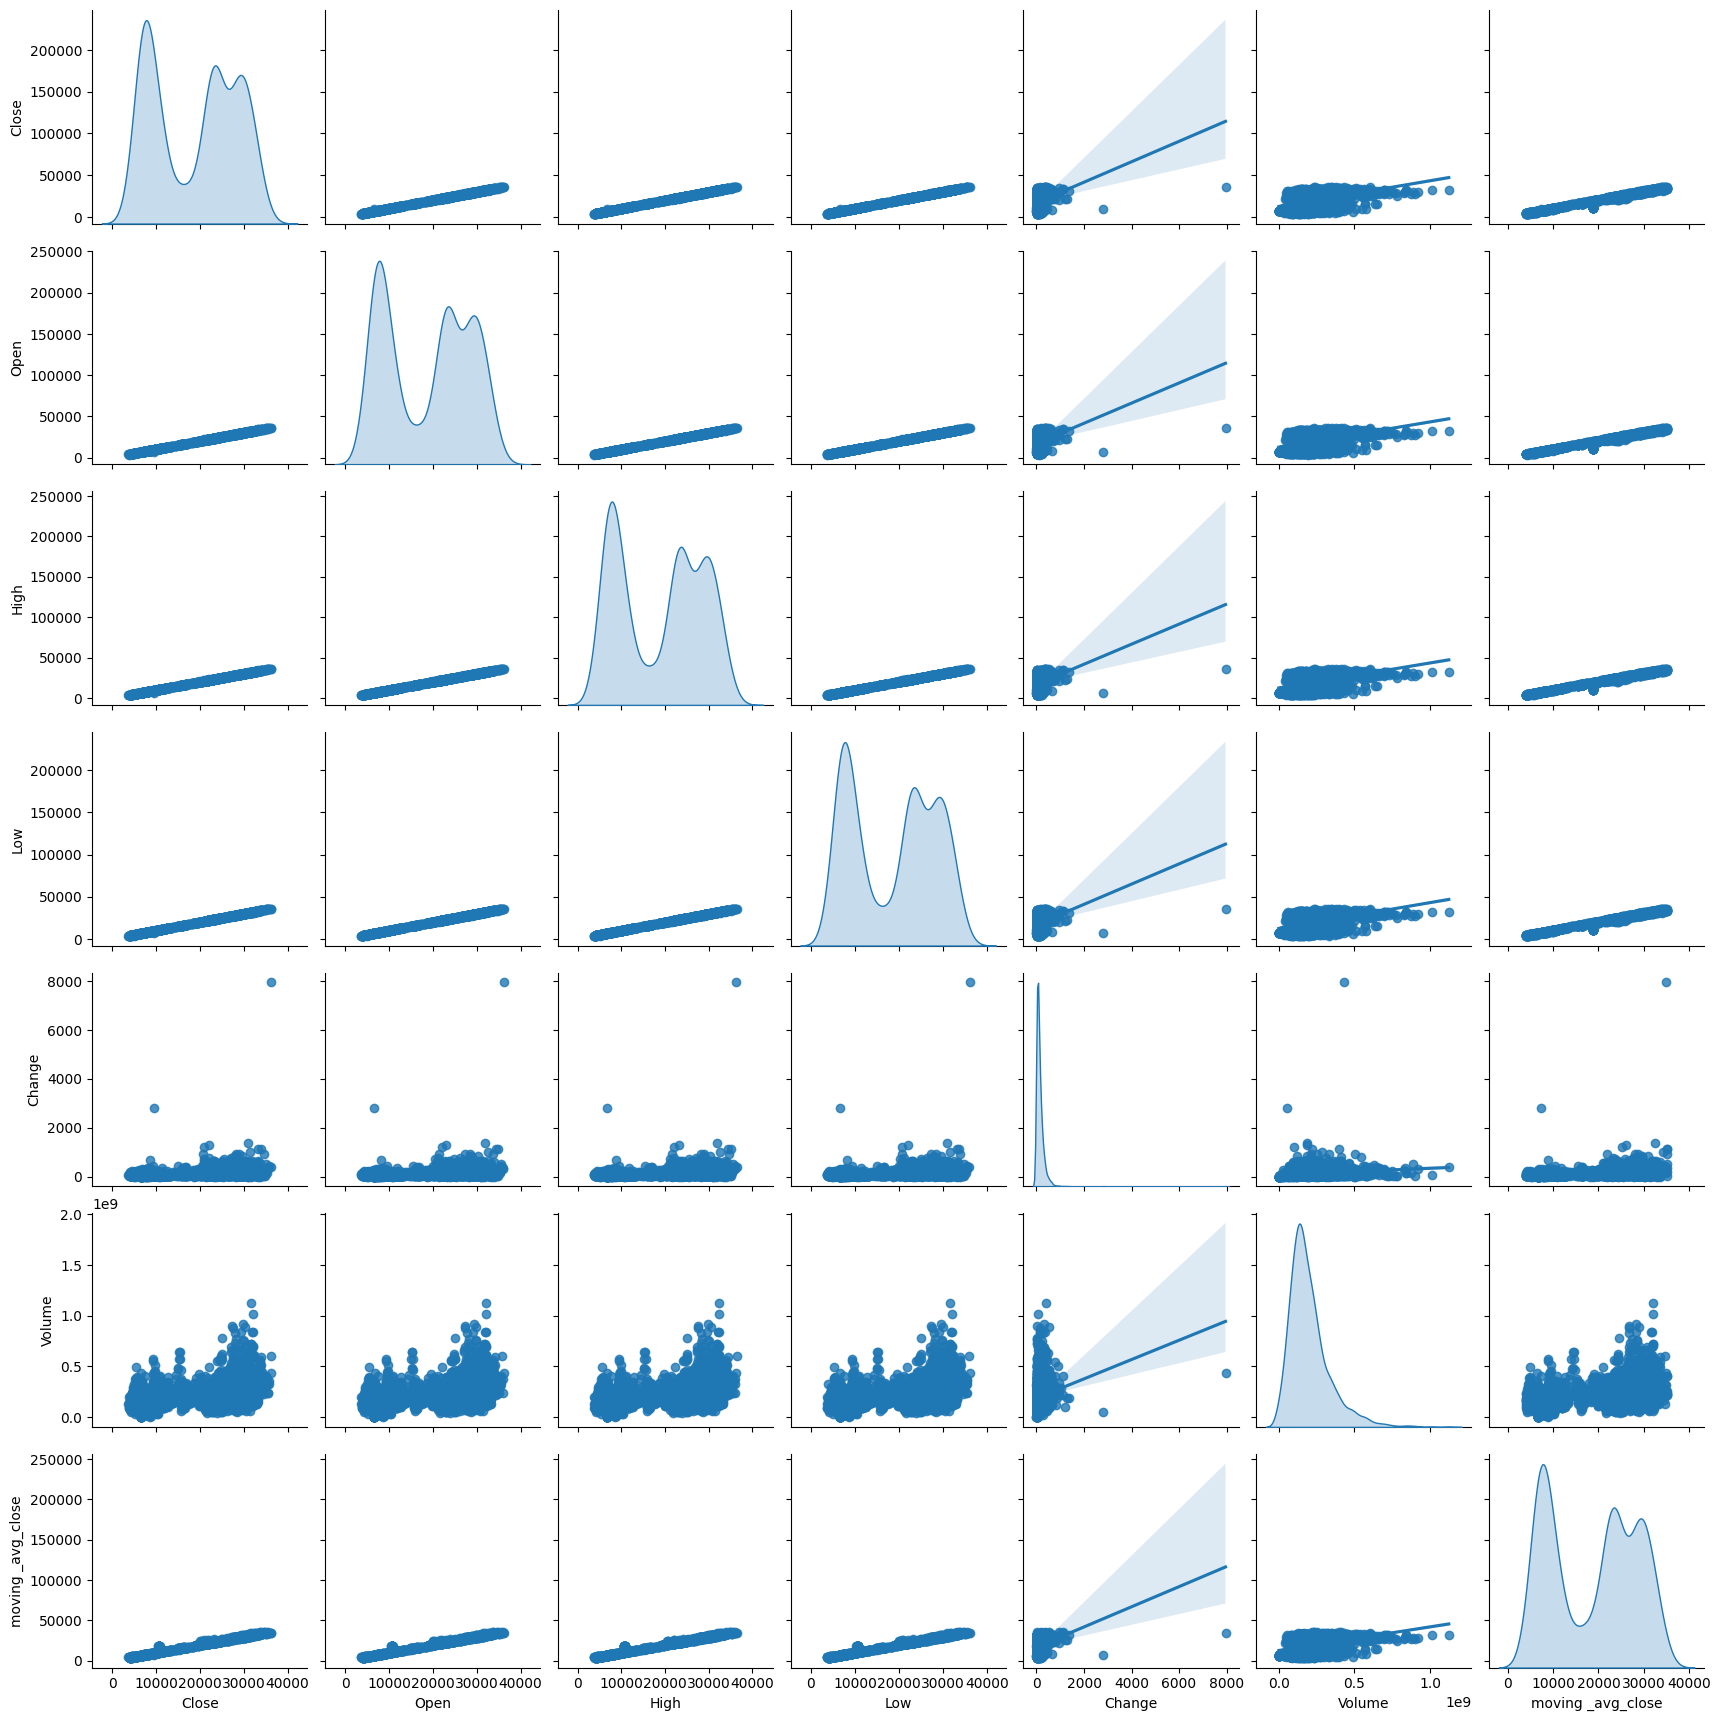

In [ ]:
train_dataset = x_train.copy()
train_dataset.insert(0, "Close", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

In [ ]:
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('knn', KNeighborsRegressor())])

param_grid = {
    "pca__n_components": [1,2,3,4,5,6],
    "knn__n_neighbors":   [2,4,5,6,7]
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(x_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
pca.fit(x_train)





Best parameter (CV score=0.996):
{'knn__n_neighbors': 2, 'pca__n_components': 5}


PCA()

we used grid search pipeline for tuning or optimization of n_componnents and n_neighbours and get optimized hyperperameters

untill now we have compltely done preprocessing of our data now we will again use cross validation method to get to know which model should we deploye for better results as our target veriable is of contineous type not a classification type so we will search among regression models

In [ ]:
#linear regression
liReg = LinearRegression()
# Define the scoring metric
scoring = 'neg_mean_squared_error'
liReg = LinearRegression()
liReg = LinearRegression()
liReg = LinearRegression()
liReg = cross_val_score(liReg, x_train, y_train, cv=5, scoring=scoring)

liReg

array([ -5239.28324569,  -5024.17740337,  -6528.38402404, -24996.24561138,
        -4501.61747821])

In [ ]:
!pip install lasso

In [ ]:
# lesso regression
lasso_regression =Lasso()
scoring = 'neg_mean_squared_error'
lasso = cross_val_score(lasso_regression, x_train, y_train, cv=5, scoring=scoring)

lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.104e+07, tolerance: 1.765e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.868e+07, tolerance: 1.774e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.651e+07, tolerance: 1.740e

array([-23319.21890235, -33832.61602281, -42405.35997134, -26271.0780556 ,
       -31411.84357688])

In [ ]:
# svr regression
svr_regression = SVR()
scoring = 'neg_mean_squared_error'
svr = cross_val_score(svr_regression, x_train, y_train, cv=5, scoring=scoring)

svr

array([-9.67854314e+07, -9.28574889e+07, -1.07424826e+08, -9.60614291e+07,
       -1.03619499e+08])

In [ ]:
# k nearest neighbours
knn_regressor = KNeighborsRegressor(n_neighbors=7)
scoring = 'neg_mean_squared_error'

knn_regressor = cross_val_score(knn_regressor, x_train, y_train, cv=5, scoring=scoring)

knn_regressor

array([-79162171.95858423, -78585838.22032987, -84259521.57561615,
       -74290990.8770512 , -79410821.66172147])

In [ ]:
# random forrest
random_forest_regressor = RandomForestRegressor()
scoring = 'neg_mean_squared_error'
random_forest = cross_val_score(random_forest_regressor, x_train, y_train, cv=5, scoring=scoring)


random_forest


array([ -9963.04277396, -14639.83897657, -27118.20922991, -11808.17417164,
       -13910.3063004 ])

In [ ]:
gradient_boosting_regressor = GradientBoostingRegressor()
scoring = 'neg_mean_squared_error'
gradient=cross_val_score(gradient_boosting_regressor, x_train, y_train, cv=5, scoring=scoring)


gradient


array([-15259.01301561, -16699.11636661, -34584.53438875, -15104.18143301,
       -19464.9877116 ])

In [ ]:
xgoost_regressor = XGBRegressor()
scoring = 'neg_mean_squared_error'
xgoost=cross_val_score(xgoost_regressor, x_train, y_train, cv=5, scoring=scoring)

xgoost




array([-16892.31206108, -30515.66593061, -32921.45114603, -21959.86235913,
       -24372.9225246 ])

In [ ]:
lightGBM_regressor = LGBMRegressor()
scoring = 'neg_mean_squared_error'
lightGBM=cross_val_score(lightGBM_regressor, x_train, y_train, cv=5, scoring=scoring)

lightGBM



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1932, number of used features: 6
[LightGBM] [Info] Start training from score 18677.150739
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1932, number of used features: 6
[LightGBM] [Info] Start training from score 18605.154288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

array([-13358.23019863, -21487.05539617, -35605.50220224, -17695.3108686 ,
       -21533.12645402])

we calculated negative_mean_sqr error for manny regression models now we will create a table dataframe of their neg_mean_squared_error for comparison

In [ ]:
# -ve_mean_sqr_error
data={
    'linear_regression':liReg,

    'lasso_regression':lasso,
    'svr_regression': svr,
    'knn_regressor':knn_regressor,
    'random_forest_regressor':random_forest,
    'gradient_boosting_regressor':gradient,



    'xgoost_regressor':xgoost,
    'lightGBM_regressor':lightGBM
}
df_neg_mean_sqr_error = pd.DataFrame(data)
df_neg_mean_sqr_error

,linear_regression,lasso_regression,svr_regression,knn_regressor,random_forest_regressor,gradient_boosting_regressor,xgoost_regressor,lightGBM_regressor
0,-4765.566281,-23319.218902,-9.678543e+07,-7.916217e+07,-9963.042774,-15259.013016,-16892.312061,-13358.230199
1,-14157.689201,-33832.616023,-9.285749e+07,-7.858584e+07,-14639.838977,-16699.116367,-30515.665931,-21487.055396
2,-21202.023594,-42405.359971,-1.074248e+08,-8.425952e+07,-27118.209230,-34584.534389,-32921.451146,-35605.502202
3,-4136.256508,-26271.078056,-9.606143e+07,-7.429099e+07,-11808.174172,-15104.181433,-21959.862359,-17695.310869
4,-6002.552954,-31411.843577,-1.036195e+08,-7.941082e+07,-13910.306300,-19464.987712,-24372.922525,-21533.126454


now we will calculate mean of each column and will save it at the bottom of each column

In [ ]:
mean_values = df_neg_mean_sqr_error.mean()
mean_values
df_neg_mean_sqr_error.loc['Mean'] = mean_values
df_neg_mean_sqr_error

,linear_regression,lasso_regression,svr_regression,knn_regressor,random_forest_regressor,gradient_boosting_regressor,xgoost_regressor,lightGBM_regressor
0,-4765.566281,-23319.218902,-9.678543e+07,-7.916217e+07,-9963.042774,-15259.013016,-16892.312061,-13358.230199
1,-14157.689201,-33832.616023,-9.285749e+07,-7.858584e+07,-14639.838977,-16699.116367,-30515.665931,-21487.055396
2,-21202.023594,-42405.359971,-1.074248e+08,-8.425952e+07,-27118.209230,-34584.534389,-32921.451146,-35605.502202
3,-4136.256508,-26271.078056,-9.606143e+07,-7.429099e+07,-11808.174172,-15104.181433,-21959.862359,-17695.310869
4,-6002.552954,-31411.843577,-1.036195e+08,-7.941082e+07,-13910.306300,-19464.987712,-24372.922525,-21533.126454
Mean,-10052.817707,-31448.023306,-9.934973e+07,-7.914187e+07,-15487.914290,-20222.366583,-25332.442804,-21935.845024


In [ ]:
lowest_mean_col = mean_values.idxmin()

lowest_mean_value = mean_values.min()

highest_mean_col = mean_values.idxmax()

highest_mean_value = mean_values.max()




print(f"The column with the lowest mean is '{lowest_mean_col}' with a value of {lowest_mean_value}")
print(f"The column with the highest mean is '{highest_mean_col}' with a value of {highest_mean_value}")

The column with the lowest mean is 'svr_regression' with a value of -99349734.9611935
The column with the highest mean is 'linear_regression' with a value of -10052.817707412116


by using cross validation score and cv=5 we applied different regression models on random 5 samples 4 for training and remaining one for testing of our data set we calculated the negative_mean_squared_error of diffrent models we will chose the one with highest negative_mean_squared_error

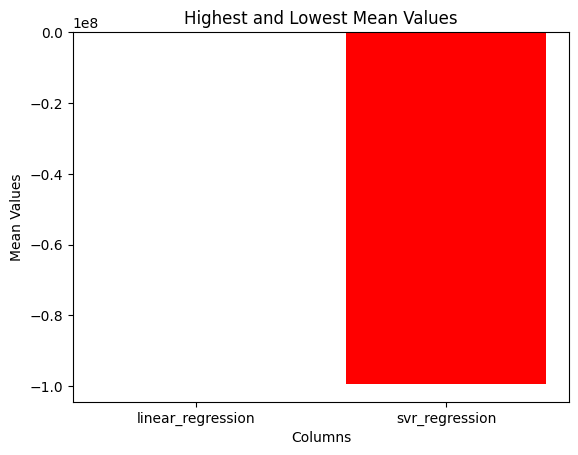

In [ ]:
# Create a dictionary to store the values
mean_values = {
    highest_mean_col: highest_mean_value,
    lowest_mean_col: lowest_mean_value
}

# Plotting the bar chart
plt.bar(mean_values.keys(), mean_values.values(), color=['green', 'red'])

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Highest and Lowest Mean Values')

# Show plot
plt.show()



inializing linear regression model after cross validation of regression models in during validations we observed that 'svr_regression' performed worst and and 'linear regression' performed best so we will go with best performer to get best prediction

In [ ]:
# initializing linear model
linear_regssion_model = LinearRegression()


In [ ]:
# training linear model
linear_regssion_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# model score
model_score=linear_regssion_model.score(x_train, y_train)
print("model score:", model_score)

model score: 0.9999149857966521


evaluation

In [ ]:
coefficient = linear_regssion_model.coef_
print("coefficient:", coefficient)

coefficient: [-6.62862714e-01  8.66552194e-01  7.91152033e-01  7.34387469e-02
 -5.70090769e-08  4.93067163e-03]


when all th features are zero the value of  of target variable is intercet

In [ ]:
intercept= linear_regssion_model.intercept_
print("intercept:", intercept )

intercept: -2.6600267991088913


evaluation with test data set

In [ ]:
y_pred = linear_regssion_model.predict(x_test)
print("y_pred:", y_pred)

y_pred: [31695.73264217  8499.51094092  7401.25051642 15758.18301264
  7105.36920558 22910.94465242 10818.21207711 10683.09757668
 10891.36603282  8577.23083922 31704.17681919  6579.73126207
 23181.00303117  8588.37216465  8750.81149721 21757.35491712
 22943.62668181 30007.50538349  4171.61565607 11691.44266905
 30965.17245479  8143.00656465 23734.18616714 30489.8063093
  7143.33045776 22690.65883719 28077.30808359  9811.07636641
 21433.27208661  4004.61719526  8208.05132028  8341.60316608
  8016.33385358 26514.21351602 31644.67994103 15785.88173556
 25588.27569252 23706.00463351  9735.62498495  7002.37271836
 23337.65645734 12635.57015621 26238.7417908  21437.20196922
 21984.48527972 13130.97226896  8655.64310704 33090.75996468
 16296.23210831 30243.97560067 24895.1665637  18714.3436007
 22655.25842202  6662.01335485 15852.98084242 16415.17906714
  8672.17878206 27259.82514979 24807.75425773 18594.85217806
  5349.9525915  32658.89129223 33493.06065261 10120.35690883
  9601.28725104  8

In [ ]:
# mean_sq_err =mean_squared_error(y_test, y_prid)
mean_sq_err =mean_squared_error(y_test, y_pred)

print("mean_sq_err:", mean_sq_err)

mean_sq_err: 6188.455066068282


In [ ]:
r2Score = r2_score(y_test, y_pred)
r2Score

0.9999320740571003

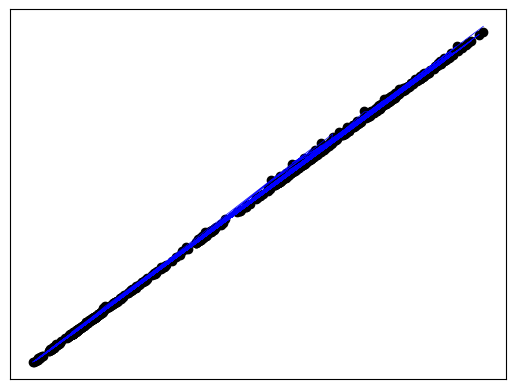

In [ ]:
# Plot outputs
plt.scatter(x_test['Low'], y_test, color="black")
plt.plot(x_test['Low'], y_pred, color="blue", linewidth=0.5)

plt.xticks(())
plt.yticks(())

plt.show()

we have predicted values of target veraible'Close ' now for comparison between orignal values of Close and our models predicted one we will add them in our test data set we will store them in a new column and will name that column predictd_values

In [ ]:
df_test['Predicted_values'] = y_pred
print(df_test.head())

                Open      High       Low     Close  Change     Volume  \
Date                                                                    
2016-12-21  32118.47  32161.72  31571.28  31902.80  166.41  388567936   
2011-05-30   8504.34   8534.14   8479.77   8488.55   14.39  120596848   
2010-04-08   7423.86   7454.50   7385.82   7413.57    8.25  245291232   
2013-07-08  15714.45  15800.36  15699.34  15785.44  101.26  325649952   
2010-07-15   7149.94   7183.04   7065.59   7072.98   60.01   91695896   

            moving _avg_close  Predicted_values  
Date                                             
2016-12-21           30618.23      31695.732642  
2011-05-30            8342.51       8499.510941  
2010-04-08            7152.91       7401.250516  
2013-07-08           15432.63      15758.183013  
2010-07-15            6863.84       7105.369206  


moving colmn 'Predicted_values' next to our target column 'Close' by using pandas loc method

In [ ]:
changing_position =['Open', 'High', 'Low', 'Close', 'Predicted_values', 'Change', 'Volume', 'moving _avg_close']
df_test =df_test.loc[:, changing_position]
df_test


,Open,High,Low,Close,Predicted_values,Change,Volume,moving _avg_close
Date,,,,,,,,
2016-12-21,32118.47,32161.72,31571.28,31902.80,31695.732642,166.41,388567936,30618.23
2011-05-30,8504.34,8534.14,8479.77,8488.55,8499.510941,14.39,120596848,8342.51
2010-04-08,7423.86,7454.50,7385.82,7413.57,7401.250516,8.25,245291232,7152.91
2013-07-08,15714.45,15800.36,15699.34,15785.44,15758.183013,101.26,325649952,15432.63
2010-07-15,7149.94,7183.04,7065.59,7072.98,7105.369206,60.01,91695896,6863.84
...,...,...,...,...,...,...,...,...
2017-02-13,33815.57,33979.69,33676.79,33744.45,33817.305147,12.06,362407552,33704.28
2012-06-13,9487.37,9532.95,9404.11,9422.33,9455.769329,38.17,77658280,9734.53
2020-05-07,23940.76,23979.43,23602.38,23650.99,23705.489338,292.73,175994570,23044.22


actual vs predicted plot

In [ ]:
print(x_test.shape)
print(y_test.shape)
print(y_pred.shape)

(806, 6)
(806,)
(806,)


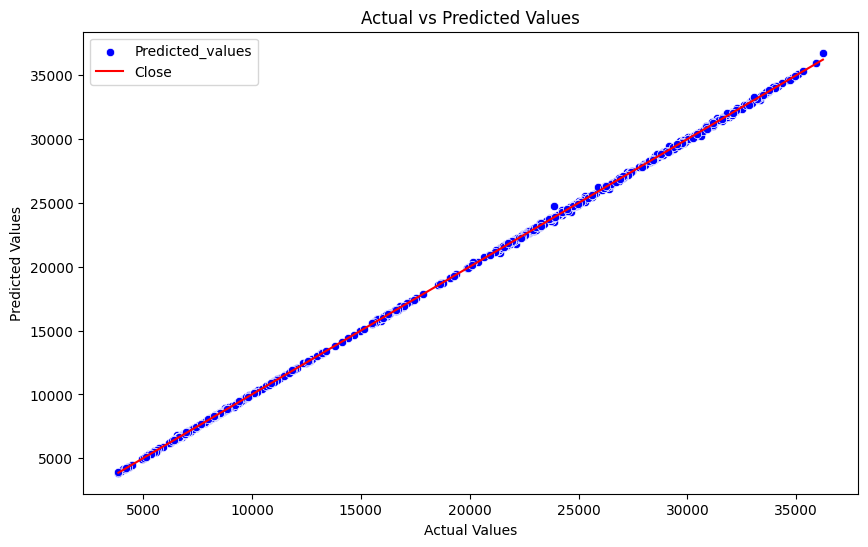

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted_values')
sns.lineplot(x=y_test, y=y_test, color='red', label='Close')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

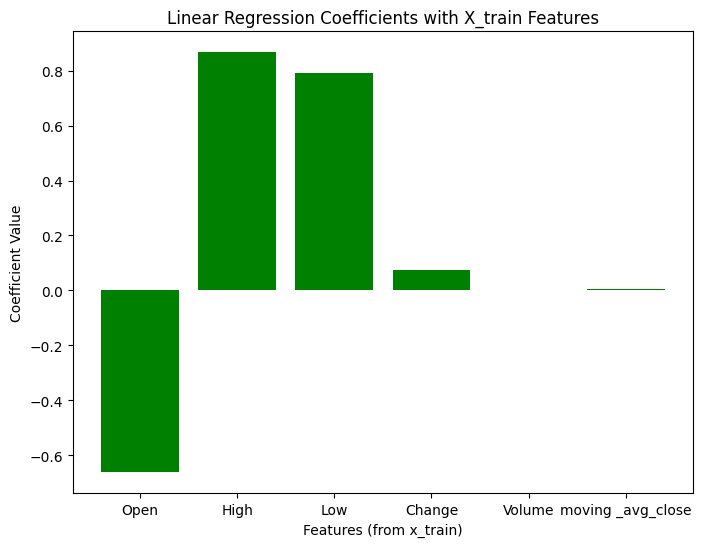

In [ ]:
# features and coefficents plot
coefficients = coefficient
features = x_train.columns

# Plot the coefficients using X_train columns as labels
plt.figure(figsize=(8, 6))
plt.bar(features, coefficients, color='green')
plt.xlabel('Features (from x_train)')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients with X_train Features')
plt.show()

this graph of coeficient indicates that feature 'Open' has inverse relation ship for 1 unit increase in our target feature Open will decrease 0.6 unit,feature high has positive impact for 1 unit increse in target it will increse 0.8 unit direct proportionate relation ship
then Low has direct proportionate least impact of feature change on target and moving_avg_close have no impact on our target

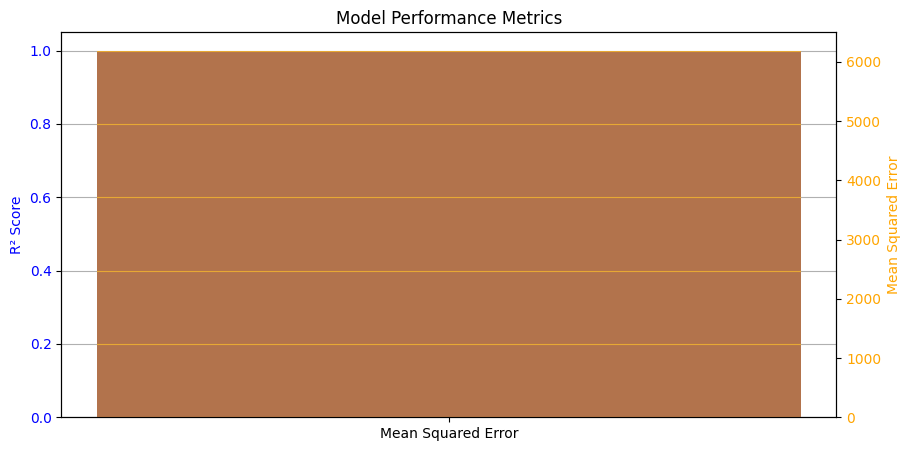

In [ ]:

metrics = ['R2 Score', 'Mean Squared Error']
values = [r2Score, mean_sq_err/1000]


fig, ax1 = plt.subplots(figsize=(10, 5))


ax1.bar(metrics[0], values[0], color='blue', label='R2 Score')
ax1.set_ylabel('R2 Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 2nd y axix for mean_sq_err
ax2 = ax1.twinx()
ax2.bar(metrics[1], mean_sq_err, color='orange', alpha=0.7, label='Mean Squared Error')
ax2.set_ylabel('Mean Squared Error', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


plt.title('Model Performance Metrics')
ax1.grid(axis='y')


plt.show()

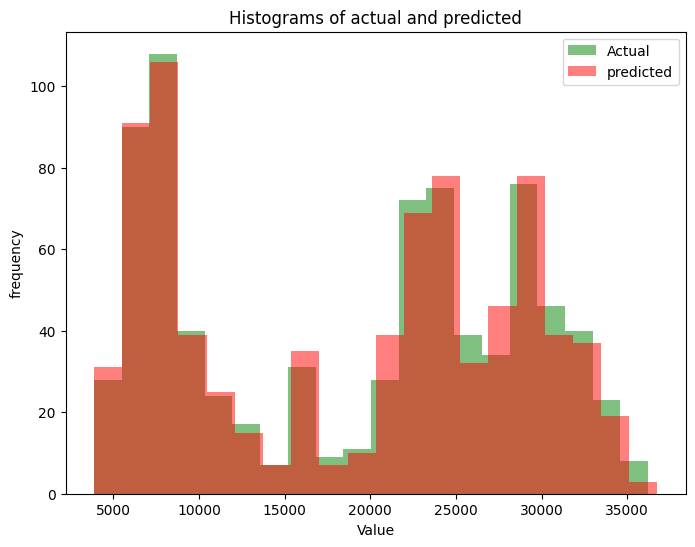

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df_test['Close'], alpha=0.5, label='Actual', color='green', bins=20)
plt.hist(df_test['Predicted_values'], alpha=0.5, label='predicted', color='red', bins=20)
plt.xlabel('Value')
plt.ylabel('frequency')
plt.title('Histograms of actual and predicted')
plt.legend(loc='upper right')
plt.show()

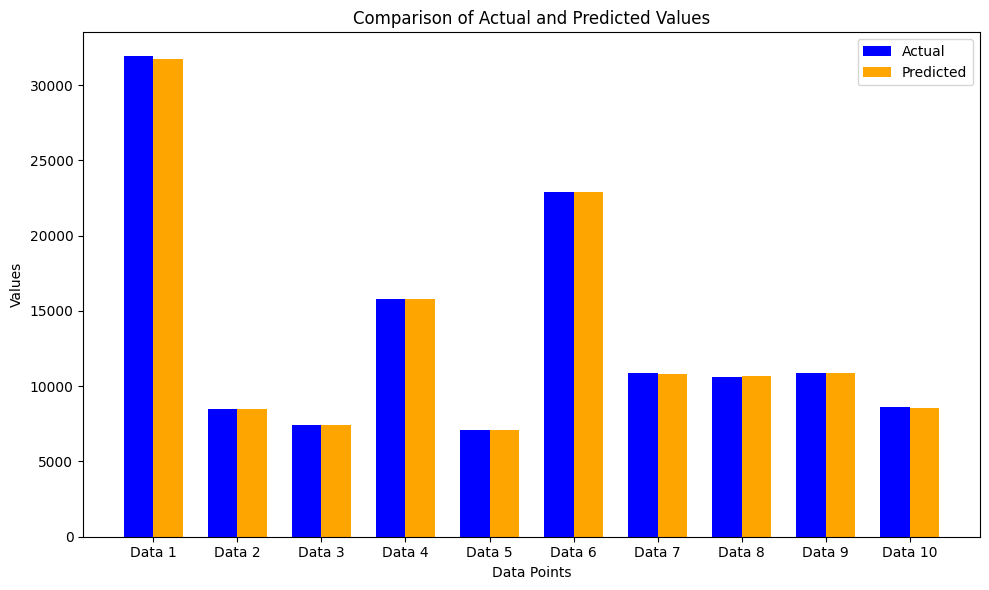

In [ ]:
actual_values = df_test['Close'][:10]
predicted_values = df_test['Predicted_values'][:10]
index = np.arange(10)
bar_width = 0.35


plt.figure(figsize=(10,6))
plt.bar(index, actual_values, bar_width, label='Actual', color='blue')
plt.bar(index + bar_width, predicted_values, bar_width, label='Predicted', color='orange')


plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')


plt.legend()


plt.xticks(index + bar_width / 2, [f'Data {i+1}' for i in range(10)])

plt.tight_layout()
plt.show()

until now we have preprocessed dataseta by checking NaN values duplicated rows we applied standard scaler and pca for best value of n_components we used grid search pipleline
after preprocessing of data we used gridsearch croess validation mathod to chek which model should we chose for better predictions . through cross validation we observe that linear regression model is best performer on our data set while svr model perfoemd worst so we decide to deploy linear regression for best prediction
we deployed linear regresion model and validated our model score on test data ,mean squared error and r2 score,
then we viualised our models different aspects with matplotlib and sea born
